# Solutions for Topic 6 "Data Cleaning"  Exercise Sheet

_Note: Cell Language is set to MSSQL and does connect to any data source. SQL generated on 2425-AppDB machine with salespeople.csv file.</br>
Comment are in MS SQL Format "--"_

Get salespeople.csv from Moodle and load it into a table in MySQL with the following attributes:</br>
* id INTEGER</br>
* name VARCHAR(50)</br>
* role VARCHAR(50)</br>
* sales_area VARCHAR(50)</br>
* q1 DOUBLE(8,2)</br>
* q2 DOUBLE(8,2)</br>
* q3 DOUBLE(8,2)</br>
* q4 DOUBLE(8,2)</br>


Create Table ...

In [ ]:
CREATE TABLE (
    id INTEGER,
    name VARCHAR(50),
    role VARCHAR(50),
    sales_area VARCHAR(50),
    q1 DOUBLE(8,2),
    q2 DOUBLE(8,2),
    q3 DOUBLE(8,2),
    q4 DOUBLE(8,2)
);



Insert CSV data ... </br>
*(file salespeople.csv located on local DB machine in C:\Users\appDB\Downloads)*

In [ ]:
LOAD DATA LOCAL INFILE "C:/Users/appDb/Downloads/salespeople.csv"
INTO TABLE salespeople
FIELDS TERMINATED BY ","
OPTIONALLY ENCLOSED BY '"'
LINES TERMINATED BY '\r\n'
IGNORE 1 LINES;

1. All names should be in the format firstname surname.</br>
Names currently not in that format are in the format surname, firstname and should be changed

File salespeople.csv was edited prior to LOAD DATA.</br>
Names updated to correct format

2. An indicator column entitled isNorthernMgr should be added to the table with the value 1 if the
salesperson is a Manager from sales_area North.

In [ ]:
ALTER TABLE salespeople
    -> ADD isNorthernMgr BOOLEAN;

In [ ]:
UPDATE salespeople
    -> SET isNorthernMgr =
    -> CASE sales_area
    ->  WHEN "North" THEN 1
    ->  ELSE 0
    -> END;

3. Add a column entitled Q1_Range that contains the following values:

In [ ]:
ALTER TABLE salespeople
    -> ADD Q1_Range VARCHAR(4); --Choose a 4 Character Field Size

In [ ]:
USE salespeople;

UPDATE salespeople
SET Q1_Range =
	CASE
		WHEN (q1 < 10000.0) THEN '<10K'
        WHEN (q1 BETWEEN 10000.0 AND 14999.99) THEN '<15K'
		WHEN (q1 BETWEEN 15000.0 AND 19999.99) THEN '<20K'
        WHEN (q1 BETWEEN 20000.0 AND 29999.99) THEN '<30K'
        WHEN (q1 > 29999.99) THEN '>30K'
	END;

Final Database ...

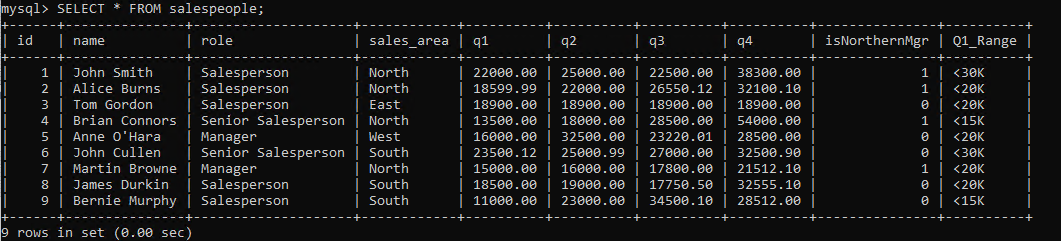